In [1]:
from helpers import loadData
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

X, Y = loadData('winequality-red-1.csv')
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=42)

In [2]:
MAX_LAYER_SIZE = 101

layerCombinations = []
layerSizes = list(range(MAX_LAYER_SIZE)[::25])
layerSizes.pop(0)
for i in layerSizes:
    layerCombinations.append((i))
    for j in layerSizes:
        layerCombinations.append((i,j))
        for k in layerSizes:
            layerCombinations.append((i,j,k))



clf = MLPClassifier()
grid = {
    'hidden_layer_sizes':layerCombinations,
    'activation': ['logistic'],
    'max_iter': [300],
}

cv = GridSearchCV(estimator=clf, param_grid=grid)
cv.fit(X_train, Y_train)

/usr/local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/base.py:566: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  X = check_array(X, **check_params)
/usr/local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/base.py:566: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be

GridSearchCV(estimator=MLPClassifier(),
             param_grid={'activation': ['logistic'],
                         'hidden_layer_sizes': [25, (25, 25), (25, 25, 25),
                                                (25, 25, 50), (25, 25, 75),
                                                (25, 25, 100), (25, 50),
                                                (25, 50, 25), (25, 50, 50),
                                                (25, 50, 75), (25, 50, 100),
                                                (25, 75), (25, 75, 25),
                                                (25, 75, 50), (25, 75, 75),
                                                (25, 75, 100), (25, 100),
                                                (25, 100, 25), (25, 100, 50),
                                                (25, 100, 75), (25, 100, 100),
                                                50, (50, 25), (50, 25, 25),
                                                (50, 25, 50), (50, 25, 75)

In [8]:
print(cv.best_params_)

mlp_final = MLPClassifier(hidden_layer_sizes=(100,50,75), max_iter=300, activation='logistic')
mlp_final.fit(X_train, Y_train)
y_pred = mlp_final.predict(X_test)

{'activation': 'logistic', 'hidden_layer_sizes': (100, 50, 75), 'max_iter': 300}


/usr/local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/base.py:566: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  X = check_array(X, **check_params)


Accuracy: 0.6
Classification report:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0
           5       0.73      0.66      0.69       183
           6       0.62      0.57      0.60       183
           7       0.31      0.44      0.37        34
           8       0.00      0.00      0.00         0

    accuracy                           0.60       400
   macro avg       0.28      0.28      0.28       400
weighted avg       0.65      0.60      0.62       400



/usr/local/lib/python3.9/site-packages/sklearn/base.py:566: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  X = check_array(X, **check_params)
/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/site-packages/sklearn/metrics

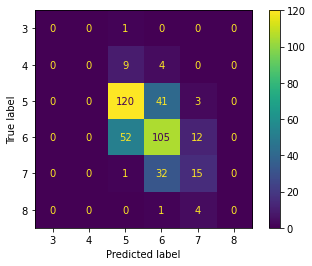

In [9]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report

print(f"Accuracy: {mlp_final.score(X_test,Y_test)}")
clas = classification_report(y_pred, Y_test)
print("Classification report:")
print(clas)

plot_confusion_matrix(mlp_final,X_test, Y_test,values_format='d' )